In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Data

In [4]:
hp=pd.read_csv('C:\HealthApp.csv',delimiter=',')

In [6]:
hp.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


Check for any null values present or not 

In [5]:
hp.isnull().sum()

LineId           0
Time             0
Component        0
Pid              0
Content          0
EventId          0
EventTemplate    0
dtype: int64

Check for any null values present or not 

Checking for duplicate values

In [6]:
hp.duplicated().sum()

0

Converting time in proper formate for extraction of minute details

In [7]:
hp['Time'] = pd.to_datetime(hp['Time'], format='%Y%m%d-%H:%M:%S:%f')

In [8]:
hp.sample(10)

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
1976,1977,2017-12-24 00:32:28.803,HiH_HiSyncControl,30002312,needAutoSync autoSyncSwitch is open,E36,needAutoSync autoSyncSwitch is open
1564,1565,2017-12-23 23:40:00.134,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
593,594,2017-12-23 22:18:06.164,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=129067,E4,calculateCaloriesWithCache totalCalories=<*>
205,206,2017-12-23 22:15:45.851,Step_LSC,30002312,onExtend:1514038546000 1 0 4,E39,onExtend:<*> <*> <*> <*>
1886,1887,2017-12-24 00:09:35.148,Step_LSC,30002312,onExtend:1514045375000 0 0 0,E39,onExtend:<*> <*> <*> <*>
1580,1581,2017-12-23 23:42:38.915,Step_LSC,30002312,onExtend:1514043759000 0 0 0,E39,onExtend:<*> <*> <*> <*>
339,340,2017-12-23 22:17:21.156,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514038560000##705...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...
1799,1800,2017-12-24 00:00:00.236,Step_StandReportReceiver,30002312,REPORT : 0 0 0 0,E47,REPORT : <*> <*> <*> <*>
1214,1215,2017-12-23 22:54:55.330,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514040720000##718...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...
251,252,2017-12-23 22:15:50.181,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>


In [14]:
hp['Date'] = hp['Time'].dt.date
hp['Hour'] = hp['Time'].dt.hour
hp['Minute'] = hp['Time'].dt.minute
hp['Secondes']=hp['Time'].dt.second
hp['Milisecons']=hp['Time'].dt.microsecond

In [11]:
hp.head(10)

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Hour,Minute,Secondes,Milisecons
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22,15,29,606000
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,2017-12-23,22,15,29,615000
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22,15,29,633000
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017-12-23,22,15,29,635000
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,2017-12-23,22,15,29,635000
5,6,2017-12-23 22:15:29.635,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514038440000##699...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,2017-12-23,22,15,29,635000
6,7,2017-12-23 22:15:29.636,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514038440000##7007##...,E58,setTodayTotalDetailSteps=<*>,2017-12-23,22,15,29,636000
7,8,2017-12-23 22:15:29.636,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22,15,29,636000
8,9,2017-12-23 22:15:29.645,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22,15,29,645000
9,10,2017-12-23 22:15:29.648,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>,2017-12-23,22,15,29,648000


In [12]:
hp.drop(columns='Time')

,LineId,Component,Pid,Content,EventId,EventTemplate,Date,Hour,Minute,Secondes,Milisecons
0,1,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22,15,29,606000
1,2,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,2017-12-23,22,15,29,615000
2,3,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22,15,29,633000
3,4,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017-12-23,22,15,29,635000
4,5,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,2017-12-23,22,15,29,635000
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,0,58,53,985000
1996,1997,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,0,59,7,581000
1997,1998,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,1,0,0,794000
1998,1999,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,1,1,0,935000


In [16]:
workout_events = hp[hp['EventTemplate'].str.contains('onExtend|onStandStepChanged', case=False)]

Distribution of workout hours per Day

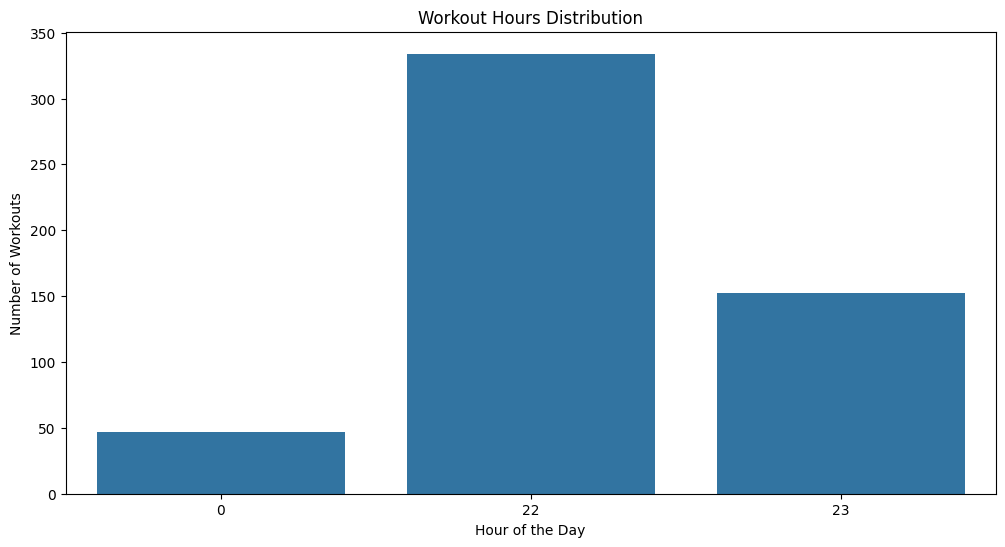

In [17]:
 
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=workout_events)
plt.title('Workout Hours Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Workouts')
plt.show()


The count plot illustrates the distribution of workout hours per day, focusing on events related to standing step changes and extensions. 
This provides a concise overview of the distribution of workout activities throughout the day, helping to identify peak workout hours.

In [18]:
steps_events = hp[hp['EventTemplate'].str.contains('flush sensor data', case=False)]
daily_steps = steps_events.groupby('Date')['EventId'].count()

Analysing number of steps taken per days

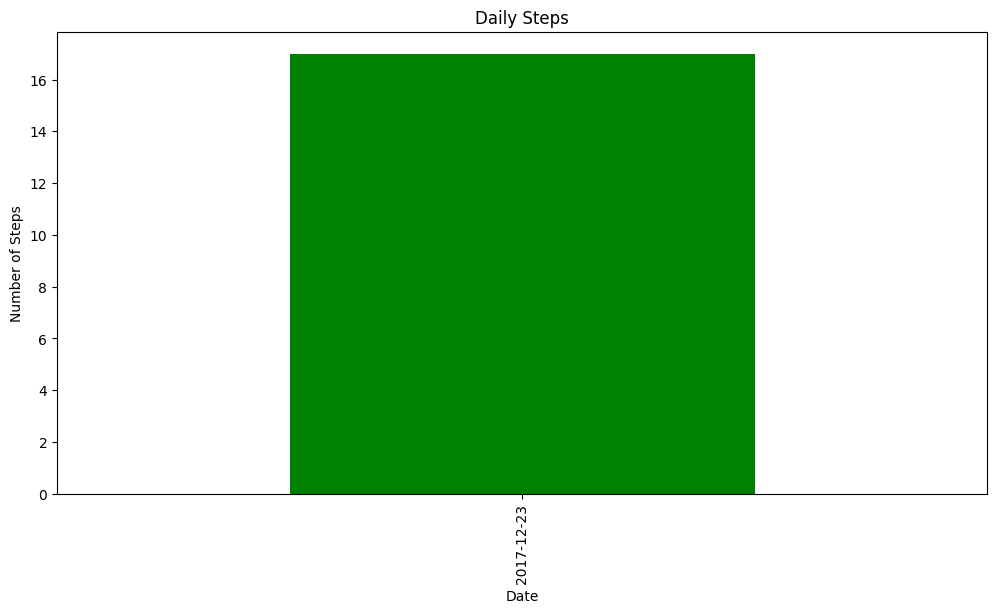

In [19]:

# Plot daily steps
plt.figure(figsize=(12, 6))
daily_steps.plot(kind='bar', color='green')
plt.title('Daily Steps')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.show()

The bar chart displays daily step counts, providing a quick overview of the variation in the number of steps over time.


C:\Users\Admin\AppData\Local\Temp\ipykernel_3888\2501293720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=active_events, palette='magma')


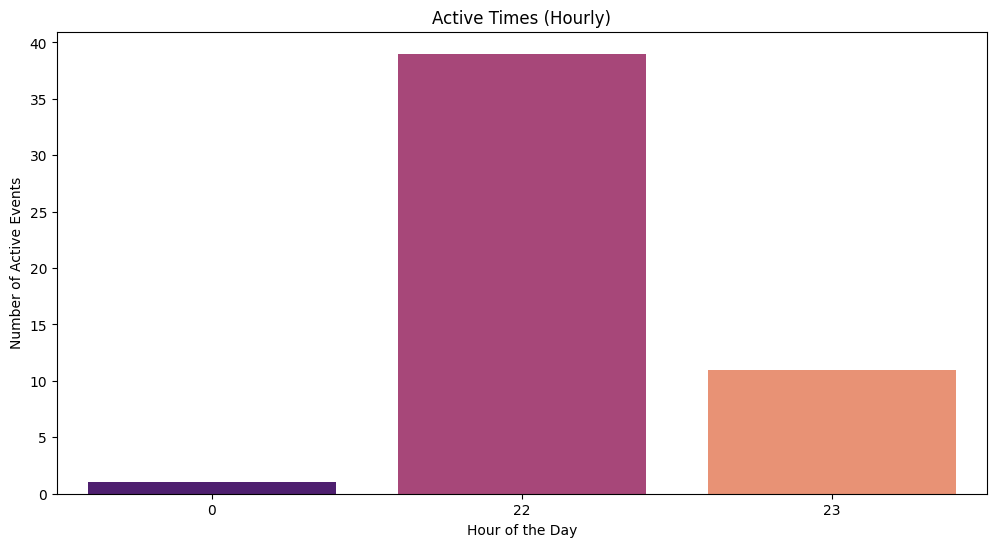

In [20]:
#Active Times (Hourly)
active_events = hp[hp['EventTemplate'].str.contains('SCREEN_ON|SCREEN_OFF', case=False)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=active_events, palette='magma')
plt.title('Active Times (Hourly)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Active Events')
plt.show()



The bar chart illustrates the distribution of active events throughout the day, focusing on the hours when events related to screen activity (SCREEN_ON and SCREEN_OFF) occur.
This analysis provides insights into peak hours of user engagement with screen-related events understanding daily usage patterns.

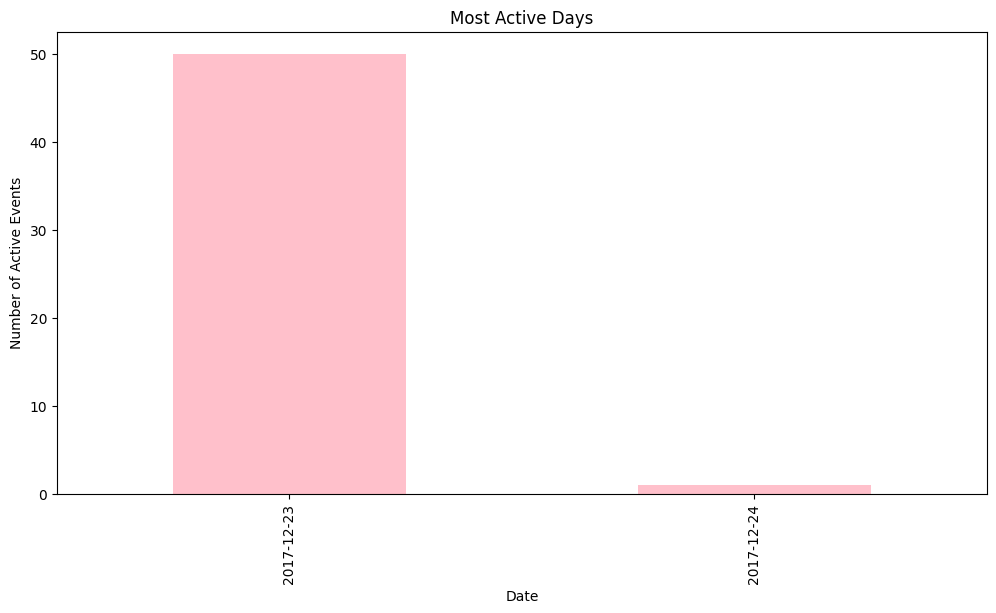

In [38]:
#Most Active Days
most_active_days = active_events.groupby('Date')['EventId'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
most_active_days.plot(kind='bar', color='pink')
plt.title('Most Active Days')
plt.xlabel('Date')
plt.ylabel('Number of Active Events')
plt.show()


The bar chart identifies the most active days based on the number of events recorded. It indicates the days with the highest event count. 
The chosen color scheme (pink) makes the visualization visually appealing. 
This analysis provides a quick overview of the days characterized by elevated user active events, helping to identify patterns or anomalies in user engagement over time.

In [30]:
hp.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Hour,Minute,Secondes,Milisecons
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22,15,29,606000
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,2017-12-23,22,15,29,615000
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22,15,29,633000
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017-12-23,22,15,29,635000
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,2017-12-23,22,15,29,635000


Distribution of Steps During Active Times

In [23]:
steps_during_active_times = steps_events[steps_events['Time'].dt.hour.isin(active_events['Time'].dt.hour)]

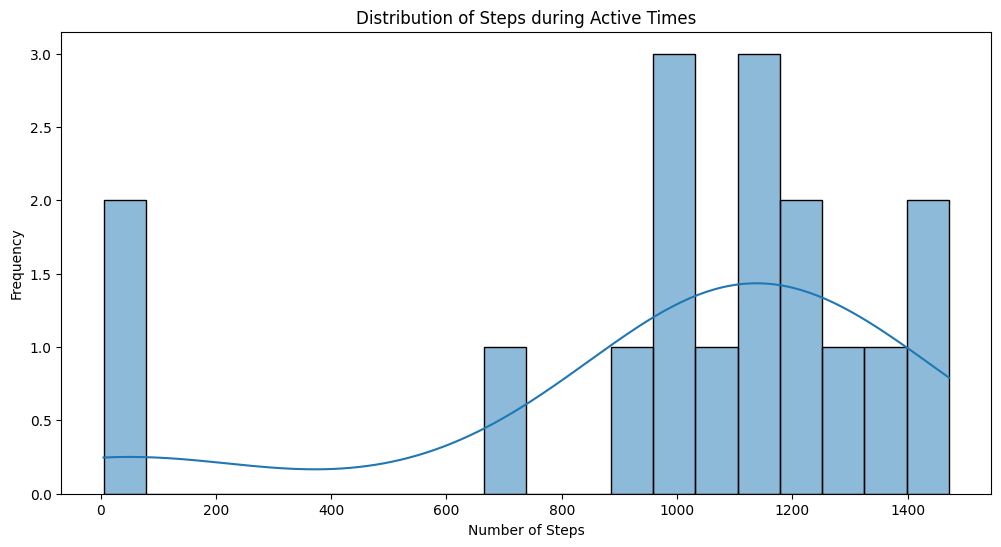

In [24]:


plt.figure(figsize=(12, 6))
sns.histplot(steps_during_active_times['LineId'], bins=20, kde=True)
plt.title('Distribution of Steps during Active Times')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.show()

The histogram displays the distribution of step counts during active hours. Most frequently, the number of steps falls within a specific range, as indicated by the peaks. 
The presence of a kernel density estimate (KDE) highlights the overall distribution pattern. 
This analysis helps understand the typical step count behavior during active periods, providing insights into user activity patterns.

Analysing the day wise active hours for events througout the week

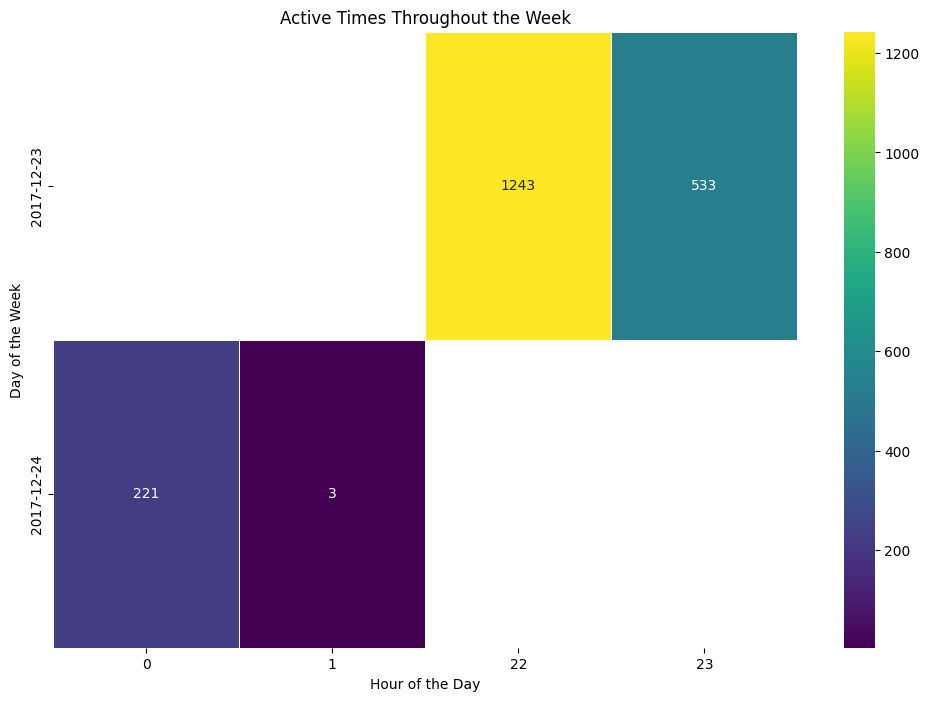

In [26]:

hp['Day'] = hp['Time'].dt.date
heatmap_data = hp.pivot_table(index='Day', columns='Hour', values='LineId', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Active Times Throughout the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

The heatmap visualizes the count of events (LineId) based on the day of the week and hour of the day.darker yello and blue indicate higher activity per day. 
The annotations provide precise event counts for each day and hour, aiding in quantitative analysis.

In [53]:
hp.sample(20)

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Hour,Minute,Secondes,Milisecons
1763,1764,2017-12-23 23:57:34.156,Step_LSC,30002312,onExtend:1514044654000 0 0 5,E39,onExtend:<*> <*> <*> <*>,2017-12-23,23,57,34,156000
740,741,2017-12-23 22:19:58.417,HiH_HiAppUtil,30002312,getBinderPackageName packageName = com.huawei....,E16,getBinderPackageName packageName = com.huawei....,2017-12-23,22,19,58,417000
1450,1451,2017-12-23 23:17:40.995,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017-12-23,23,17,40,995000
508,509,2017-12-23 22:17:52.162,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=128788,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22,17,52,162000
292,293,2017-12-23 22:15:55.657,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=127696,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,22,15,55,657000
1956,1957,2017-12-24 00:25:17.149,Step_LSC,30002312,onExtend:1514046317000 0 0 0,E39,onExtend:<*> <*> <*> <*>,2017-12-24,0,25,17,149000
140,141,2017-12-23 22:15:39.669,Step_StandReportReceiver,30002312,REPORT : 7025 5015 150475 240,E47,REPORT : <*> <*> <*> <*>,2017-12-23,22,15,39,669000
1766,1767,2017-12-23 23:57:34.457,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=131208,E4,calculateCaloriesWithCache totalCalories=<*>,2017-12-23,23,57,34,457000
1286,1287,2017-12-23 23:07:50.267,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514041560000##7189##...,E58,setTodayTotalDetailSteps=<*>,2017-12-23,23,7,50,267000
259,260,2017-12-23 22:15:51.181,Step_StandReportReceiver,30002312,REPORT : 7042 5027 150839 240,E47,REPORT : <*> <*> <*> <*>,2017-12-23,22,15,51,181000


In [29]:
get_and_set_events= hp[hp['EventTemplate'].str.contains('getTodayTotalDetailSteps|setTodayTotalDetailStep', case=False)]

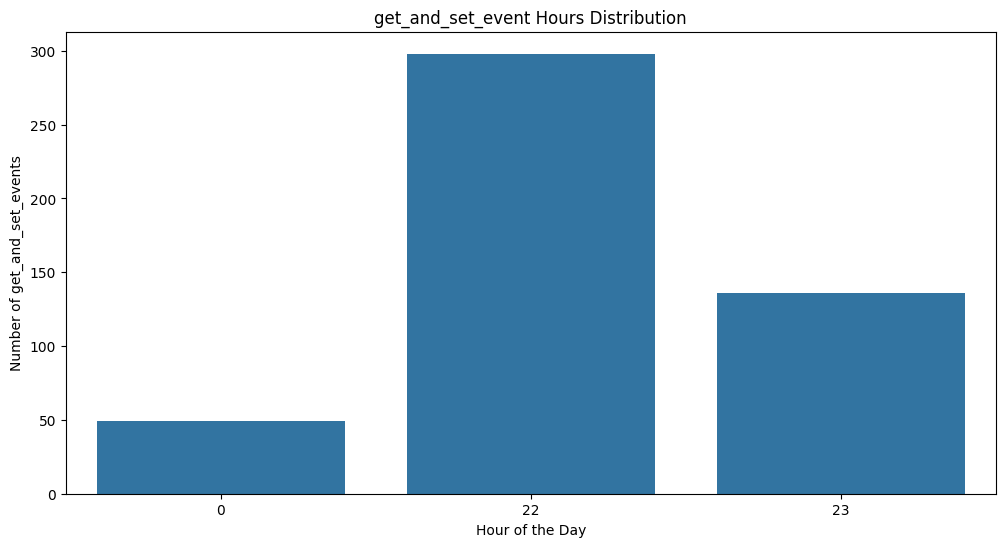

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=get_and_set_events)
plt.title('get_and_set_event Hours Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of get_and_set_events')
plt.show()

The resulting countplot indicates when set and get events are most frequent in day

In [42]:
report_events= hp[hp['EventTemplate'].str.contains('REPORT', case=False)]

C:\Users\Admin\AppData\Local\Temp\ipykernel_3888\2468020346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=report_events, palette='magma')


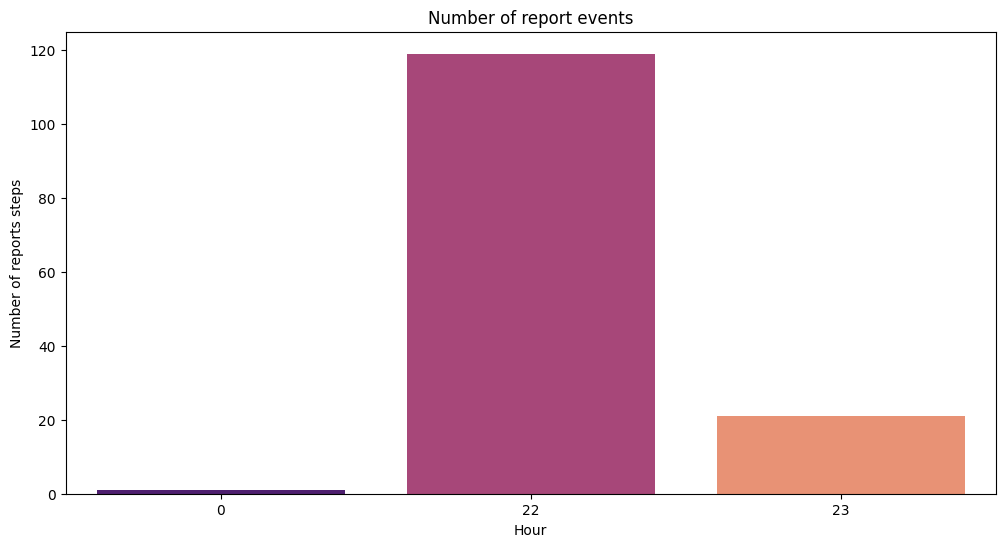

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=report_events, palette='magma')
plt.title('Number of report events')
plt.xlabel('Hour')
plt.ylabel('Number of reports steps')
plt.show()

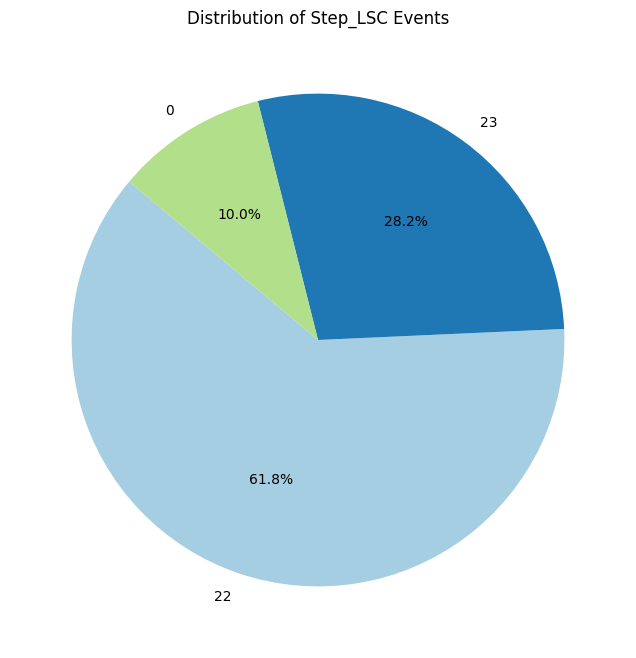

In [57]:

event_data = hp[hp['EventTemplate'].str.contains('totalCalories', regex=True)]
event_counts = event_data['Hour'].value_counts()
labels = event_counts.index
sizes = event_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of totalCalories Events')
plt.show()


The above pie analyzes and visualizes the distribution of events related to 'totalCalories' across different hours using a pie chart. 